In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
bank_df=pd.read_csv('bank_full.csv')

In [3]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   AGE        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
#no null values
marital=pd.get_dummies(bank_df['marital'],prefix='marital')
education=pd.get_dummies(bank_df['education'],prefix='education')
default=pd.get_dummies(bank_df['default'],prefix='default_credit')
housing_loan=pd.get_dummies(bank_df['housing'],prefix='house_loan')
loan=pd.get_dummies(bank_df['loan'],prefix='personal_loan')
contact=pd.get_dummies(bank_df['contact'],prefix='contacted_via')
month=pd.get_dummies(bank_df['month'])
poutcome=pd.get_dummies(bank_df['poutcome'],prefix='campaign_outcome')

In [5]:
mod_bank_df=pd.concat([bank_df,marital,education,default,housing_loan,loan,
                      contact,month,poutcome],axis=1)

In [6]:
mod_bank_df.drop(['marital','education','default','housing','loan','contact',
                 'month','poutcome'],axis=1,inplace=True)

In [7]:
mod_bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   AGE                       45211 non-null  int64 
 1   job                       45211 non-null  object
 2   balance                   45211 non-null  int64 
 3   day                       45211 non-null  int64 
 4   duration                  45211 non-null  int64 
 5   campaign                  45211 non-null  int64 
 6   pdays                     45211 non-null  int64 
 7   previous                  45211 non-null  int64 
 8   y                         45211 non-null  object
 9   marital_divorced          45211 non-null  uint8 
 10  marital_married           45211 non-null  uint8 
 11  marital_single            45211 non-null  uint8 
 12  education_primary         45211 non-null  uint8 
 13  education_secondary       45211 non-null  uint8 
 14  education_tertiary    

In [8]:
mod_bank_df.loc[:,:'marital_divorced'].head()

,AGE,job,balance,day,duration,campaign,pdays,previous,y,marital_divorced
0,18,student,1944,10,122,3,-1,0,no,0
1,18,student,108,10,167,1,-1,0,yes,0
2,18,student,608,12,267,1,-1,0,yes,0
3,18,student,35,21,104,2,-1,0,no,0
4,18,student,5,24,143,2,-1,0,no,0


In [9]:
mod_bank_df.loc[:5,'marital_married':'personal_loan_no']

,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_credit_no,default_credit_yes,house_loan_no,house_loan_yes,personal_loan_no
0,0,1,1,0,0,0,1,0,1,0,1
1,0,1,0,0,0,1,1,0,1,0,1
2,0,1,1,0,0,0,1,0,1,0,1
3,0,1,0,0,0,1,1,0,1,0,1
4,0,1,0,1,0,0,1,0,1,0,1
5,0,1,0,0,0,1,1,0,1,0,1


In [10]:
mod_bank_df.loc[:5,'personal_loan_yes':'jul']

,personal_loan_yes,contacted_via_cellular,contacted_via_telephone,contacted_via_unknown,apr,aug,dec,feb,jan,jul
0,0,0,1,0,0,1,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0
5,0,1,0,0,0,1,0,0,0,0


In [11]:
mod_bank_df.loc[:5,'jun':'campaign_outcome_unknown']

,jun,mar,may,nov,oct,sep,campaign_outcome_failure,campaign_outcome_other,campaign_outcome_success,campaign_outcome_unknown
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,1


In [12]:
bank_df.head()

,AGE,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,18,student,single,primary,no,1944,no,no,telephone,10,aug,122,3,-1,0,unknown,no
1,18,student,single,unknown,no,108,no,no,cellular,10,aug,167,1,-1,0,unknown,yes
2,18,student,single,primary,no,608,no,no,cellular,12,aug,267,1,-1,0,unknown,yes
3,18,student,single,unknown,no,35,no,no,telephone,21,aug,104,2,-1,0,unknown,no
4,18,student,single,secondary,no,5,no,no,cellular,24,aug,143,2,-1,0,unknown,no


In [13]:
age_range=[]
for i in bank_df['AGE']:
    if i<25:
        age_range.append('UNDER 25')
    elif i>=25 and i<35:
        age_range.append('25-34')
    elif i>=35 and i<45:
        age_range.append('35-44')
    elif i>=45 and i<55:
        age_range.append('45-54')
    else:
        age_range.append('ABOVE 54')
age_range=np.array(age_range)
age_range=pd.DataFrame({"age_range":age_range})

In [14]:
bank_df=bank_df.join(age_range)

In [15]:
bank_df[bank_df['AGE']>45].head()

,AGE,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_range
30763,46,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,-1,0,unknown,no,45-54
30764,46,services,married,primary,no,179,yes,no,unknown,5,may,1778,1,-1,0,unknown,no,45-54
30765,46,self-employed,married,tertiary,no,137,yes,yes,unknown,5,may,246,1,-1,0,unknown,no,45-54
30766,46,management,divorced,secondary,no,16,yes,yes,unknown,5,may,188,2,-1,0,unknown,no,45-54
30767,46,management,married,tertiary,no,229,yes,no,unknown,5,may,197,1,-1,0,unknown,no,45-54


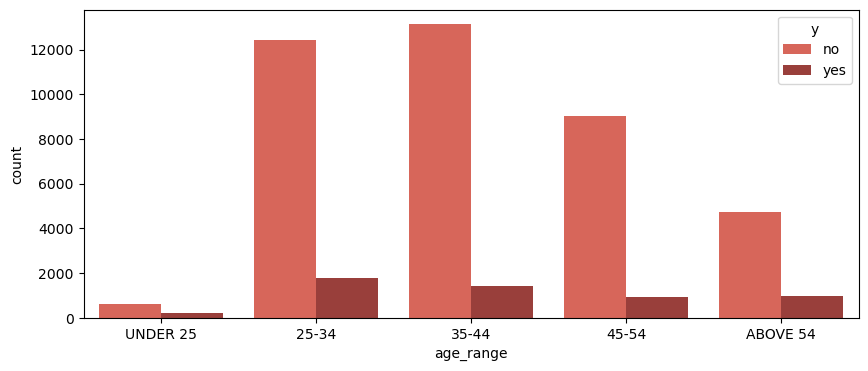

In [16]:
#checking age range wise , how many people subscribed to term deposit
plt.figure(figsize=(10,4))
sns.countplot(data=bank_df,x='age_range',hue='y',palette='Reds_d')
plt.show()

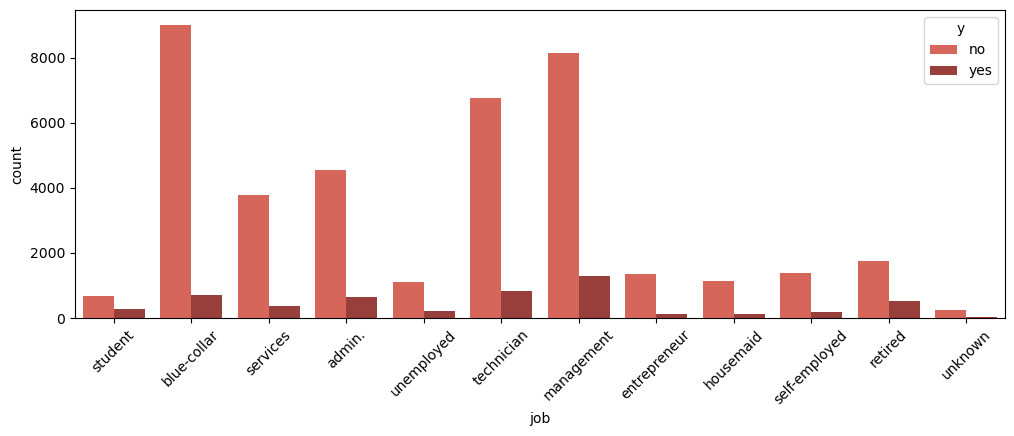

In [17]:
plt.figure(figsize=(12,4))
ax=sns.countplot(data=bank_df,x='job',hue='y',palette='Reds_d')
ax.set_xticklabels(rotation=45,labels=bank_df.job.unique())
plt.show()

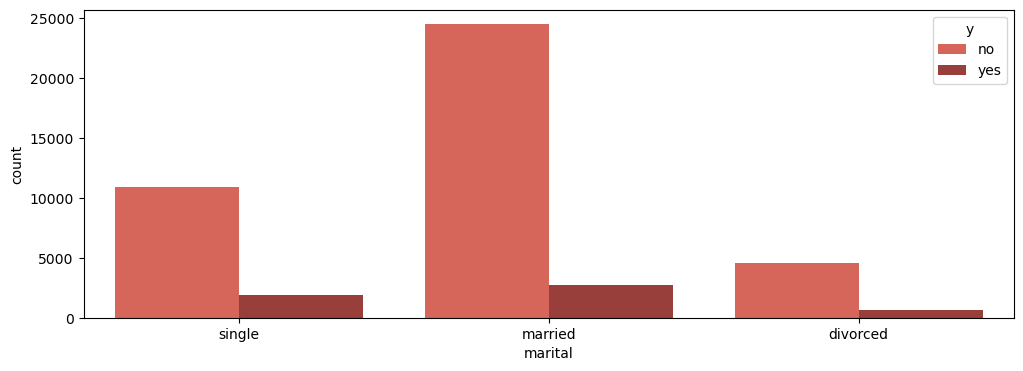

In [18]:
plt.figure(figsize=(12,4))
ax=sns.countplot(data=bank_df,x='marital',hue='y',palette='Reds_d')
ax.set_xticklabels(rotation=0,labels=bank_df.marital.unique())
plt.show()

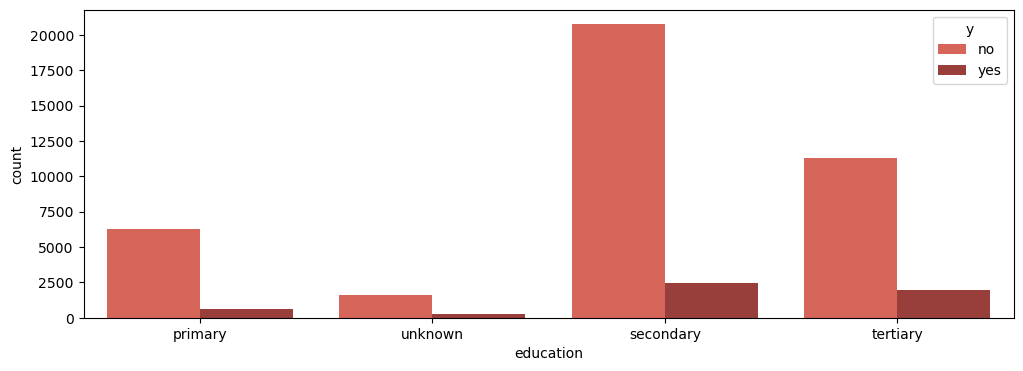

In [19]:
plt.figure(figsize=(12,4))
ax=sns.countplot(data=bank_df,x='education',hue='y',palette='Reds_d')
ax.set_xticklabels(rotation=0,labels=bank_df.education.unique())
plt.show()

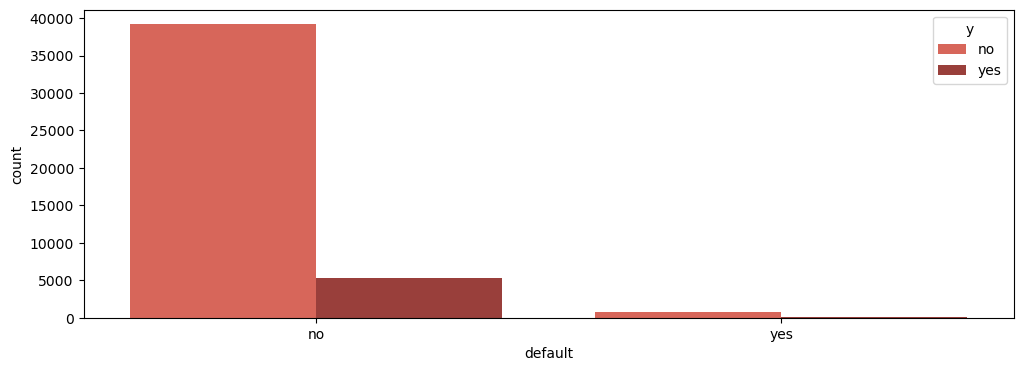

In [20]:
plt.figure(figsize=(12,4))
ax=sns.countplot(data=bank_df,x='default',hue='y',palette='Reds_d')
ax.set_xticklabels(rotation=0,labels=bank_df.default.unique())
plt.show()

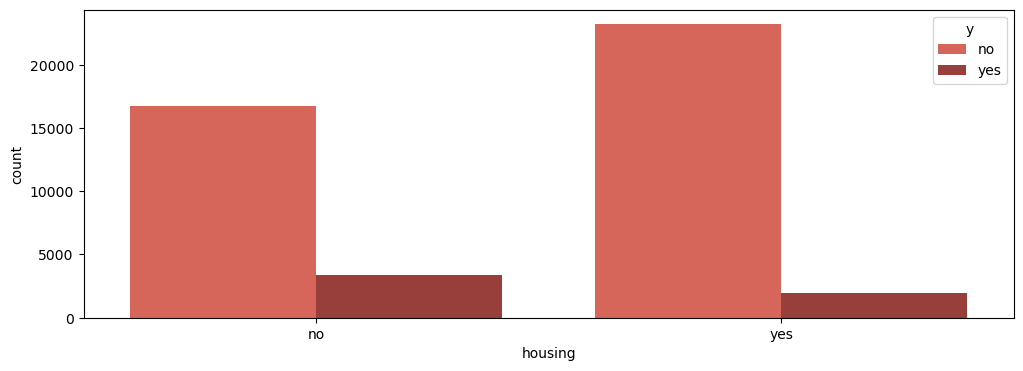

In [21]:
plt.figure(figsize=(12,4))
ax=sns.countplot(data=bank_df,x='housing',hue='y',palette='Reds_d')
ax.set_xticklabels(rotation=0,labels=bank_df.housing.unique())
plt.show()

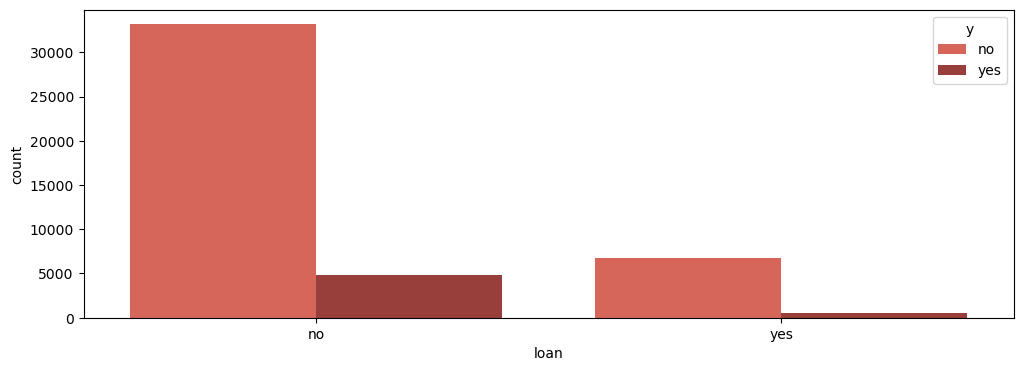

In [22]:
plt.figure(figsize=(12,4))
ax=sns.countplot(data=bank_df,x='loan',hue='y',palette='Reds_d')
ax.set_xticklabels(rotation=0,labels=bank_df.loan.unique())
plt.show()

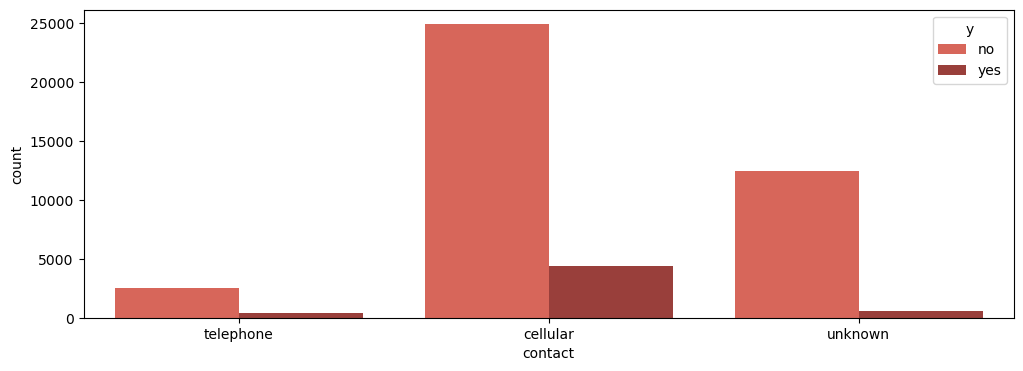

In [23]:
plt.figure(figsize=(12,4))
ax=sns.countplot(data=bank_df,x='contact',hue='y',palette='Reds_d')
ax.set_xticklabels(rotation=0,labels=bank_df.contact.unique())
plt.show()

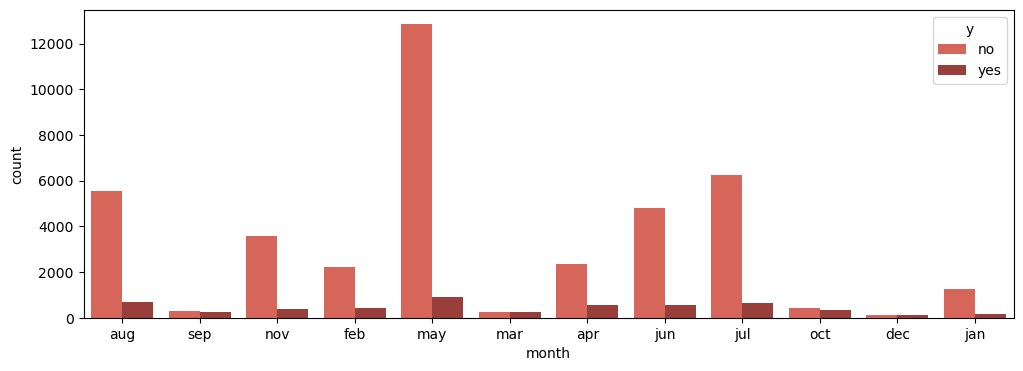

In [24]:
plt.figure(figsize=(12,4))
ax=sns.countplot(data=bank_df,x='month',hue='y',palette='Reds_d')
ax.set_xticklabels(rotation=0,labels=bank_df.month.unique())
plt.show()

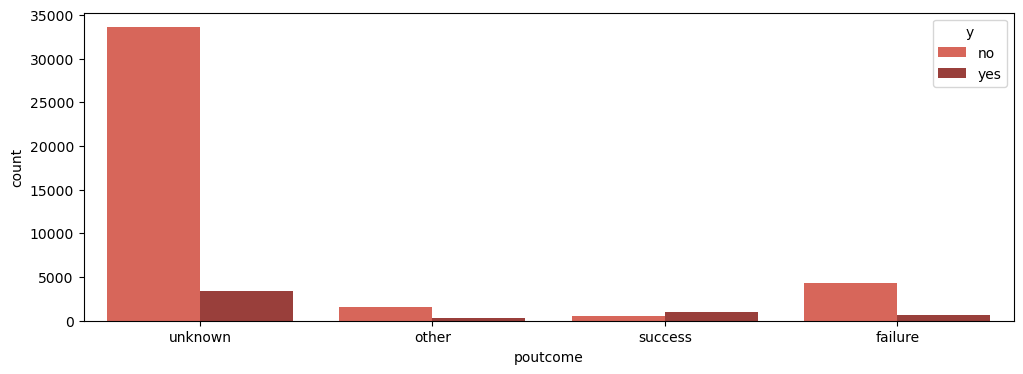

In [25]:
plt.figure(figsize=(12,4))
ax=sns.countplot(data=bank_df,x='poutcome',hue='y',palette='Reds_d')
ax.set_xticklabels(rotation=0,labels=bank_df.poutcome.unique())
plt.show()

In [26]:
bank_df.describe()

,AGE,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


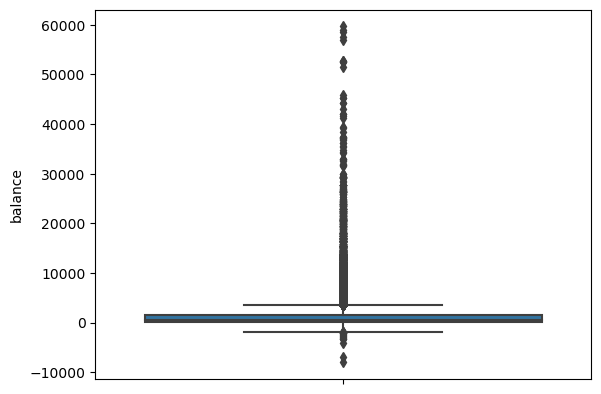

In [27]:
sns.boxplot(data=bank_df[bank_df['balance']<60000],y='balance')
plt.show()

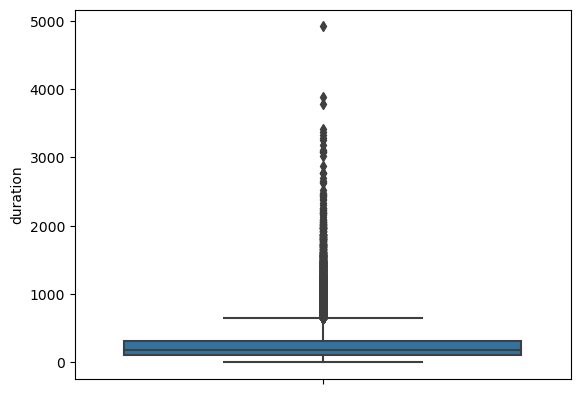

In [28]:
sns.boxplot(data=bank_df[bank_df['balance']<60000],y='duration')
plt.show()

In [29]:
bank_df['y'].replace('yes',1,inplace=True)

In [30]:
bank_df['y'].replace('no',0,inplace=True)

In [31]:
bank_df.corr()['y']

AGE         0.025155
balance     0.052838
day        -0.028348
duration    0.394521
campaign   -0.073172
pdays       0.103621
previous    0.093236
y           1.000000
Name: y, dtype: float64

<AxesSubplot:>

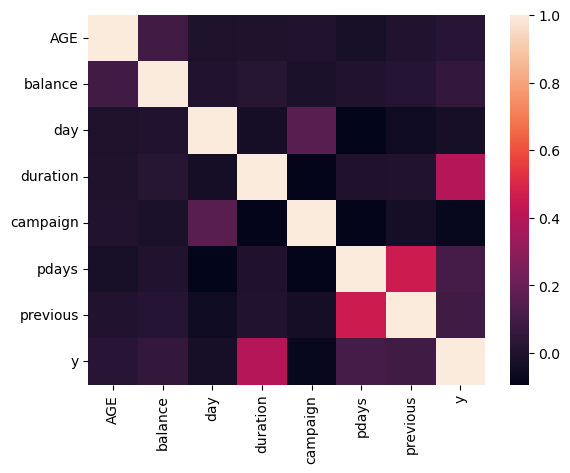

In [32]:
sns.heatmap(data=bank_df.corr())

<AxesSubplot:xlabel='age_range', ylabel='count'>

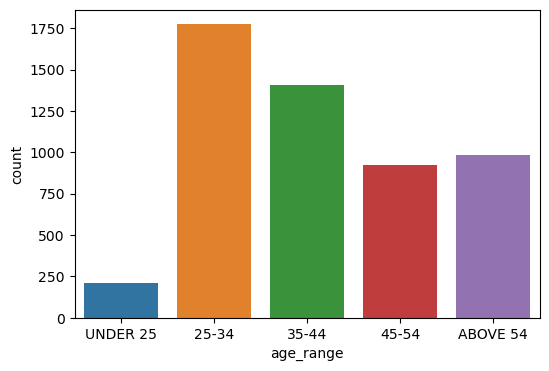

In [33]:
yes_bank_df=bank_df[bank_df['y']==1]
plt.figure(figsize=(6,4))
sns.countplot(data=yes_bank_df,x='age_range')

Text(0.5, 0, 'Contacted Via')

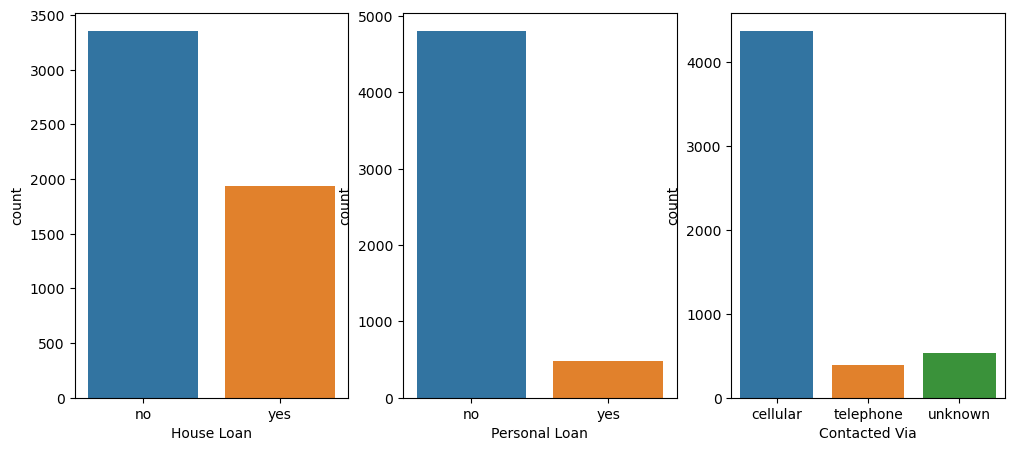

In [34]:
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(12,5))
sns.countplot(data=yes_bank_df,x='housing',ax=axs[0])
sns.countplot(data=yes_bank_df,x='loan',ax=axs[1])
sns.countplot(data=yes_bank_df,x='contact',ax=axs[2])
axs[0].set_xlabel('House Loan')
axs[1].set_xlabel('Personal Loan')
axs[2].set_xlabel('Contacted Via')
#sns.countplot(data=yes_bank_df,x='age_range',ax=axs[1,1])


[Text(0, 0, 'student'),
 Text(1, 0, 'blue-collar'),
 Text(2, 0, 'technician'),
 Text(3, 0, 'admin.'),
 Text(4, 0, 'entrepreneur'),
 Text(5, 0, 'services'),
 Text(6, 0, 'self-employed'),
 Text(7, 0, 'management'),
 Text(8, 0, 'housemaid'),
 Text(9, 0, 'unemployed'),
 Text(10, 0, 'unknown'),
 Text(11, 0, 'retired')]

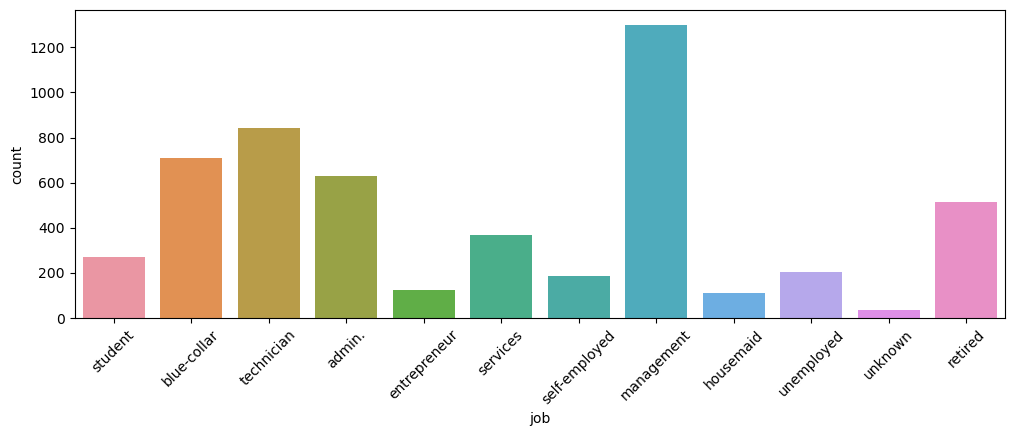

In [35]:
plt.figure(figsize=(12,4))
ax=sns.countplot(data=yes_bank_df,x='job')
ax.set_xticklabels(rotation=45,labels=yes_bank_df.job.unique())

[Text(0, 0, 'aug'),
 Text(1, 0, 'sep'),
 Text(2, 0, 'nov'),
 Text(3, 0, 'feb'),
 Text(4, 0, 'may'),
 Text(5, 0, 'mar'),
 Text(6, 0, 'apr'),
 Text(7, 0, 'jul'),
 Text(8, 0, 'oct'),
 Text(9, 0, 'dec'),
 Text(10, 0, 'jan'),
 Text(11, 0, 'jun')]

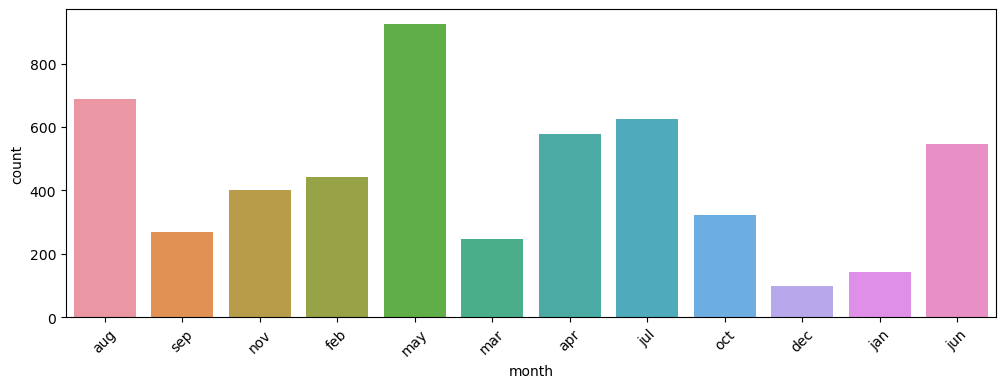

In [36]:
plt.figure(figsize=(12,4))
ax=sns.countplot(data=yes_bank_df,x='month')
ax.set_xticklabels(rotation=45,labels=yes_bank_df.month.unique())

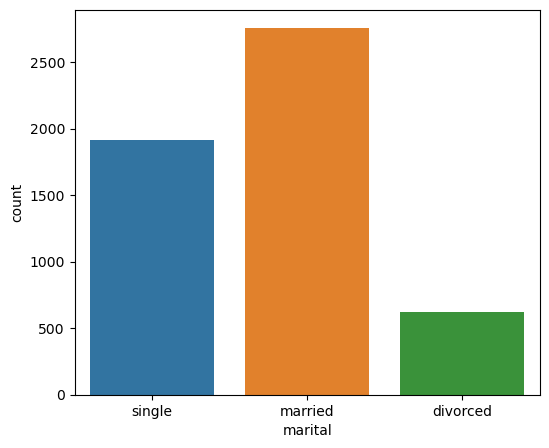

In [37]:
plt.figure(figsize=(6,5))
ax1=sns.countplot(data=yes_bank_df,x='marital')

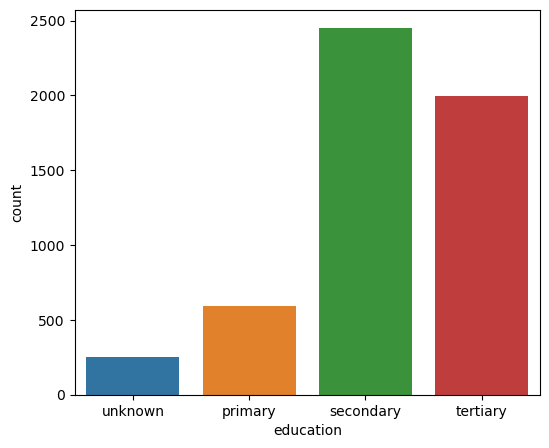

In [38]:
plt.figure(figsize=(6,5))
ax1=sns.countplot(data=yes_bank_df,x='education')

Text(0.5, 0, 'Default Credit')

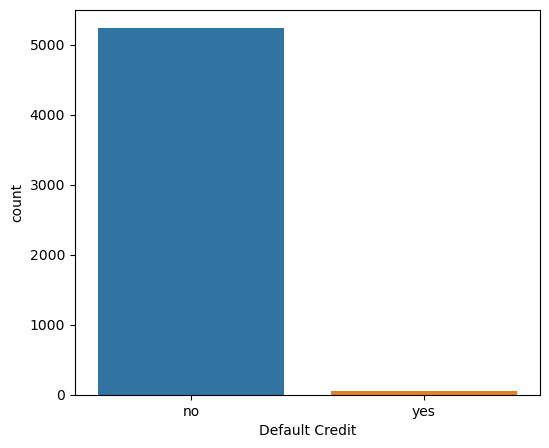

In [39]:
plt.figure(figsize=(6,5))
ax1=sns.countplot(data=yes_bank_df,x='default')
ax1.set_xlabel('Default Credit')

In [40]:
len(yes_bank_df)

5289

In [41]:
#default - credit - No
#education - secondry
#marital - married
#month - not[sep,march,oct,dec,jan]
#job - [management,technician,blue-collar]
#age_range - above or 25
#contact stream - Cellular
#house loan - no
#personal loan - no

In [42]:
#now let's build classifier model
mod_bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   AGE                       45211 non-null  int64 
 1   job                       45211 non-null  object
 2   balance                   45211 non-null  int64 
 3   day                       45211 non-null  int64 
 4   duration                  45211 non-null  int64 
 5   campaign                  45211 non-null  int64 
 6   pdays                     45211 non-null  int64 
 7   previous                  45211 non-null  int64 
 8   y                         45211 non-null  object
 9   marital_divorced          45211 non-null  uint8 
 10  marital_married           45211 non-null  uint8 
 11  marital_single            45211 non-null  uint8 
 12  education_primary         45211 non-null  uint8 
 13  education_secondary       45211 non-null  uint8 
 14  education_tertiary    

In [43]:
jobs=pd.get_dummies(mod_bank_df.job)

In [44]:
mod_bank_df=mod_bank_df.join(jobs)

In [45]:
mod_bank_df.drop('job',axis=1,inplace=True)
mod_bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   AGE                       45211 non-null  int64 
 1   balance                   45211 non-null  int64 
 2   day                       45211 non-null  int64 
 3   duration                  45211 non-null  int64 
 4   campaign                  45211 non-null  int64 
 5   pdays                     45211 non-null  int64 
 6   previous                  45211 non-null  int64 
 7   y                         45211 non-null  object
 8   marital_divorced          45211 non-null  uint8 
 9   marital_married           45211 non-null  uint8 
 10  marital_single            45211 non-null  uint8 
 11  education_primary         45211 non-null  uint8 
 12  education_secondary       45211 non-null  uint8 
 13  education_tertiary        45211 non-null  uint8 
 14  education_unknown     

In [46]:
test_bank_df=pd.read_csv('bank.csv')

In [47]:
marital=pd.get_dummies(test_bank_df['marital'],prefix='marital')
education=pd.get_dummies(test_bank_df['education'],prefix='education')
default=pd.get_dummies(test_bank_df['default'],prefix='default_credit')
housing_loan=pd.get_dummies(test_bank_df['housing'],prefix='house_loan')
loan=pd.get_dummies(test_bank_df['loan'],prefix='personal_loan')
contact=pd.get_dummies(test_bank_df['contact'],prefix='contacted_via')
month=pd.get_dummies(test_bank_df['month'])
poutcome=pd.get_dummies(test_bank_df['poutcome'],prefix='campaign_outcome')
jobs=pd.get_dummies(test_bank_df.job)

In [48]:
mod_test_bank_df=pd.concat([test_bank_df,marital,education,default,housing_loan,
                           loan,contact,month,poutcome,jobs],axis=1)

In [49]:
mod_test_bank_df.drop(['job','marital', 'education', 'default',  'housing',
       'loan', 'contact','month','poutcome'],axis=1,inplace=True)

In [50]:
mod_test_bank_df['AGE']=mod_test_bank_df['age']
mod_test_bank_df.drop('age',axis=1,inplace=True)

In [51]:
mod_test_bank_df['y'].replace('yes',1,inplace=True)
mod_test_bank_df['y'].replace('no',0,inplace=True)

In [52]:
mod_bank_df['y'].replace('yes',1,inplace=True)
mod_bank_df['y'].replace('no',0,inplace=True)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
# Load data
X=mod_bank_df.drop('y',axis=1)
y=mod_bank_df['y']
y.head()

# Make predictions on test data
X_test=mod_test_bank_df.drop('y',axis=1)
y_test=mod_test_bank_df['y']

# Create logistic regression model
lr_model = LogisticRegression()
# Train models on training data
lr_model.fit(X,y)
# Evaluate model performance on lr
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression model Accuracy: %.2f%%" % (accuracy * 100.0))

# Create Decision Tree Model
dtc_model=DTC()
#train dtc model
dtc_model.fit(X,y)
# Evaluate model performance on dtc
y_pred=dtc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree model Accuracy: %.2f%%" % (accuracy * 100.0))

# Create Random Forest Model
rf_model = RFC(n_estimators=100, random_state=42)
#train dtc model
rf_model.fit(X,y)
# Evaluate model performance on dtc
y_pred=rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest model Accuracy: %.2f%%" % (accuracy * 100.0))

Logistic Regression model Accuracy: 84.69%
Decision Tree model Accuracy: 86.31%
Random Forest model Accuracy: 88.48%


In [54]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X,y)
# Evaluate model performance on Naive bayes
y_pred=nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Gussian model Accuracy: %.2f%%" % (accuracy * 100.0))

Naive Bayes Gussian model Accuracy: 18.87%


In [56]:
'''from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X,y)
# Evaluate model performance on Naive bayes
y_pred=knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Support Vector Machine model Accuracy: %.2f%%" % (accuracy * 100.0))'''

'from sklearn.neighbors import KNeighborsClassifier\nknn_model = KNeighborsClassifier(n_neighbors=5)\nknn_model.fit(X,y)\n# Evaluate model performance on Naive bayes\ny_pred=knn_model.predict(X_test)\naccuracy = accuracy_score(y_test, y_pred)\nprint("Support Vector Machine model Accuracy: %.2f%%" % (accuracy * 100.0))'

In [122]:
y_pred = lr_model.predict(X_test)

In [123]:
y_test[30]

1

In [124]:
len(y_pred[y_pred==1])

181

In [118]:
y_test[y_test==1].index

Int64Index([  13,   30,   33,   34,   36,   37,   38,   49,   50,   53,
            ...
            4433, 4447, 4458, 4465, 4484, 4494, 4503, 4504, 4505, 4511],
           dtype='int64', length=521)